# <u><center>Avocado Dataset EDA<center></u>

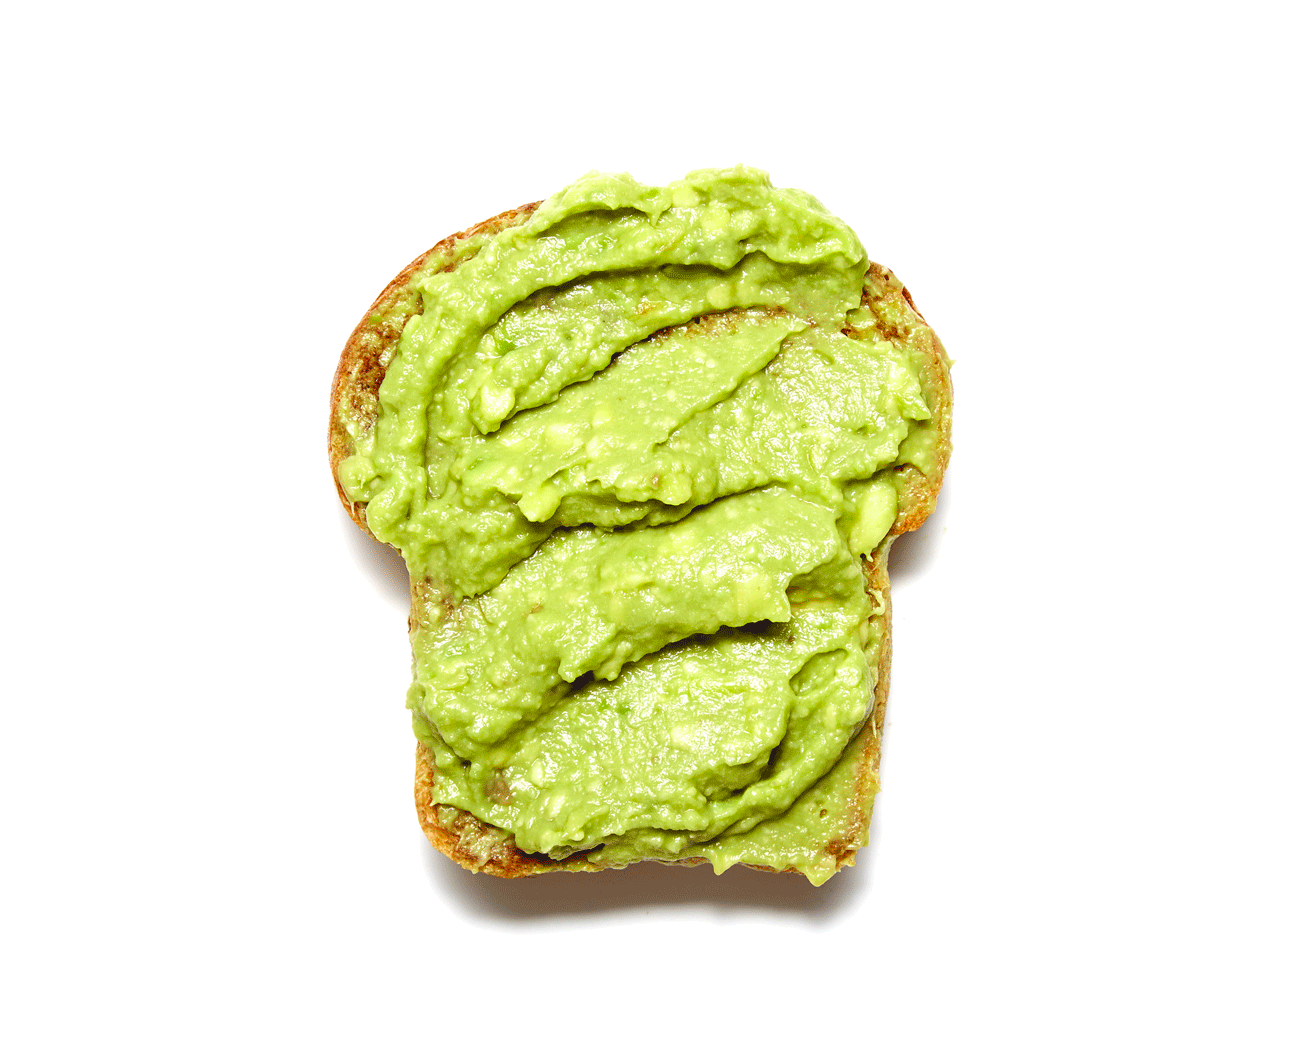

### Data Loading and Description

- This data has been taken from Kaggle website and contains records from <i><b>4 January 2015 up to 17 May 2020</b></i>.
- Link: <i>https://www.kaggle.com/timmate/avocado-prices-2020</i>
- The dataset comprises of __33045 observations of 13 columns__. Below is a table showing names of all the columns and their description.
- The regions, which have been included in this observations are in __the USA__. 
- The price is mesured in __US Dollars__. 
- The quantity of the bags in measured in counting __the bags__. 
- __4046, 4225, 4770__ stands for the __PLU code__ (Price look-up code)
    - __Small/Medium Hass Avocado (~3-5oz avocado)__ | #4046
    - __Large Hass Avocado (~8-10oz avocado)__ | #4225
    - __Extra Large Hass Avocado (~10-15oz avocado)__ | #4770

<table>
<tr><th>Features</th><th>Description</th></tr>
<tr><td>‘date’</td><td>The date of the observation</td></tr>
<tr><td>‘average_price’</td><td>Average price of Avocados</td></tr>   
<tr><td>‘total_volume’</td><td>Total number of avocados sold</td></tr>
<tr><td>‘4046’</td><td>Total number of avocados with PLU 4046 sold</td></tr>
<tr><td>‘4225’</td><td>Total number of avocados with PLU 4225 sold</td></tr>
<tr><td>‘4770’</td><td>Total number of avocados with PLU 4770 sold</td></tr>
<tr><td>‘total_bags’</td><td>Total number of Bags sold (small_bags + large_bags + xlarge_bags)</td></tr>
<tr><td>‘small_bags’</td><td>Total number of Small Bags sold</td></tr>
<tr><td>‘large_bags’</td><td>Total number of Large Bags sold</td></tr>
<tr><td>‘xlarge_bags’</td><td>Total number of XLarge Bags sold</td></tr>
<tr><td>‘type’</td><td>The type of the avocados</td></tr>
<tr><td>‘year’</td><td>The year of the observation</td></tr>
<tr><td>‘geography’</td><td>The region of the observation</td></tr>
</table>

### Importing packages 

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling
%matplotlib inline

In [2]:
df = pd.read_csv('avocado-updated-2020.csv')
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


<a id=section12></a>

### Data Profiling 

- Understanding the Avocado Dataset

In [3]:
df.shape

(33045, 13)

In [4]:
df.columns

Index(['date', 'average_price', 'total_volume', '4046', '4225', '4770',
       'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year',
       'geography'],
      dtype='object')

In [5]:
regions = df.groupby('geography').groups
for reg in regions:
    print(reg)

Albany
Atlanta
Baltimore/Washington
Boise
Boston
Buffalo/Rochester
California
Charlotte
Chicago
Cincinnati/Dayton
Columbus
Dallas/Ft. Worth
Denver
Detroit
Grand Rapids
Great Lakes
Harrisburg/Scranton
Hartford/Springfield
Houston
Indianapolis
Jacksonville
Las Vegas
Los Angeles
Louisville
Miami/Ft. Lauderdale
Midsouth
Nashville
New Orleans/Mobile
New York
Northeast
Northern New England
Orlando
Philadelphia
Phoenix/Tucson
Pittsburgh
Plains
Portland
Raleigh/Greensboro
Richmond/Norfolk
Roanoke
Sacramento
San Diego
San Francisco
Seattle
South Carolina
South Central
Southeast
Spokane
St. Louis
Syracuse
Tampa
Total U.S.
West
West Tex/New Mexico


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33045 entries, 0 to 33044
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           33045 non-null  object 
 1   average_price  33045 non-null  float64
 2   total_volume   33045 non-null  float64
 3   4046           33045 non-null  float64
 4   4225           33045 non-null  float64
 5   4770           33045 non-null  float64
 6   total_bags     33045 non-null  float64
 7   small_bags     33045 non-null  float64
 8   large_bags     33045 non-null  float64
 9   xlarge_bags    33045 non-null  float64
 10  type           33045 non-null  object 
 11  year           33045 non-null  int64  
 12  geography      33045 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.3+ MB


#### Observation: 
- We could see that we are lucky as we do not have any missing values (__33045__ complete data) and __13 columns__.
- Now let's do some Feature Engineering on the Date Feature in __pre-processing__ later so we can be able to use the day and the month columns in building the machine learning model later. (I didn't mention the year because its already there in data frame).

In [7]:
df.describe()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
count,33045.000000,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,33045.000000
mean,1.379941,9.683997e+05,3.023914e+05,2.797693e+05,2.148255e+04,3.646735e+05,2.501980e+05,1.067329e+05,7.742585e+03,2017.460887
std,0.378972,3.934533e+06,1.301026e+06,1.151052e+06,1.001607e+05,1.564004e+06,1.037734e+06,5.167226e+05,4.819803e+04,1.699747
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.511895e+04,7.673100e+02,2.712470e+03,0.000000e+00,9.121860e+03,6.478630e+03,4.662900e+02,0.000000e+00,2016.000000
50%,1.350000,1.291170e+05,1.099477e+04,2.343600e+04,1.780900e+02,5.322224e+04,3.687699e+04,6.375860e+03,0.000000e+00,2017.000000
75%,1.620000,5.058285e+05,1.190219e+05,1.352389e+05,5.096530e+03,1.744314e+05,1.206624e+05,4.041723e+04,8.044400e+02,2019.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,3.168919e+07,2.055041e+07,1.332760e+07,1.403184e+06,2020.000000


- We can see all columns having count __33045__. Looks like it doesn't contain missing values.

In [8]:
df.isnull().sum()  # Will show null count for each column, but will not count zeros(0) as null

date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
dtype: int64

- We can see that __no missing values__ exist in dataset!

<a id=section12></a>

### Pre-processing 

- Earlier in __info__ we have seen that __date__ is __Object__ type not the date type. We have to change its type to datetime.
- Also I am extracting __day__ and __month__ into separate varibles to use it later in the EDA. 

- The reason for extracting the month from the __'date'__ column is that I would like to see later in the EDA if there is some kind of a trend. For instance in which months we have a higher sale of which type of avocado. 

In [9]:
df['date']=pd.to_datetime(df['date'])
df['month']=df['date'].apply(lambda x:x.month)
df['day']=df['date'].apply(lambda x:x.day)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33045 entries, 0 to 33044
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           33045 non-null  datetime64[ns]
 1   average_price  33045 non-null  float64       
 2   total_volume   33045 non-null  float64       
 3   4046           33045 non-null  float64       
 4   4225           33045 non-null  float64       
 5   4770           33045 non-null  float64       
 6   total_bags     33045 non-null  float64       
 7   small_bags     33045 non-null  float64       
 8   large_bags     33045 non-null  float64       
 9   xlarge_bags    33045 non-null  float64       
 10  type           33045 non-null  object        
 11  year           33045 non-null  int64         
 12  geography      33045 non-null  object        
 13  month          33045 non-null  int64         
 14  day            33045 non-null  int64         
dtypes: datetime64[ns](1

In [11]:
df.columns

Index(['date', 'average_price', 'total_volume', '4046', '4225', '4770',
       'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year',
       'geography', 'month', 'day'],
      dtype='object')

In [12]:
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,day
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,4
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,1,4
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,1,4
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,1,4
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,1,4


<a id=section12></a>

<a id=section12></a>

- With the next command, I am inserting a new column into the data, which called __check_Total__. Its purpose is to sum the amount of __small_bags,  large_bags__ and __xlarge_bags__ into a new one and compare if the result, which is in that column corresponds to the __total_bags__ column. 

In [13]:
df.insert(7, 'check_Total', df['small_bags'] + df['large_bags'] + df['xlarge_bags'])

In [14]:
if np.where(df['check_Total'] == df['total_bags']):
    print('Columns are equal.')

Columns are equal.


In [15]:
df.head(20)

,date,average_price,total_volume,4046,4225,4770,total_bags,check_Total,small_bags,large_bags,xlarge_bags,type,year,geography,month,day
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,1,4
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,1162.65,0.00,0.00,organic,2015,Albany,1,4
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,1,4
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,1,4
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,1,4
5,2015-01-04,1.29,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,3881.69,0.00,0.00,organic,2015,Baltimore/Washington,1,4
6,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,7755.62,6064.30,1691.32,0.00,conventional,2015,Boise,1,4
7,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,374.35,186.67,187.68,0.00,organic,2015,Boise,1,4
8,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87663.13,87406.84,256.29,0.00,conventional,2015,Boston,1,4
9,2015-01-04,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,1244.04,0.00,0.00,organic,2015,Boston,1,4


<a id=section12></a>

- By creating a new column __check_Total__, I am trying to see if I actually add the amount of __small__, __large__ and __xlarge__ bags, I'll get the same amount as it is given in the __total_bags__ column. As we could see the amounts are the same. 

In [16]:
df.drop(['check_Total'], axis = 1)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,day
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,1,4
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,1,4
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,1,4
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,1,4
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.,11,29
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,11,29
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West,11,29
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,11,29


Now, I have dropped the __check_Total__ column as it did its job and I do not need to store the information in a seperate column further in the EDA.

<a id=section12></a>

- I wanted to see which is the earliest record for the smallest average_price

In [17]:
#This sorts values based on the average price (ascending) & year (decending)

df.sort_values(["average_price", "year"], ascending=[True, False]) 

,date,average_price,total_volume,4046,4225,4770,total_bags,check_Total,small_bags,large_bags,xlarge_bags,type,year,geography,month,day
12222,2017-03-05,0.44,64057.04,223.84,4748.88,0.00,59084.32,59084.32,638.68,58445.64,0.00,organic,2017,Cincinnati/Dayton,3,5
11837,2017-02-05,0.46,2200550.27,1200632.86,531226.65,18324.93,450365.83,450365.83,113752.17,330583.10,6030.56,conventional,2017,Phoenix/Tucson,2,5
12230,2017-03-05,0.48,50890.73,717.57,4138.84,0.00,46034.32,46034.32,1385.06,44649.26,0.00,organic,2017,Detroit,3,5
12114,2017-02-26,0.49,44024.03,252.79,4472.68,0.00,39298.56,39298.56,600.00,38698.56,0.00,organic,2017,Cincinnati/Dayton,2,26
5573,2015-12-27,0.49,1137707.43,738314.80,286858.37,11642.46,100891.80,100891.80,70749.02,30142.78,0.00,conventional,2015,Phoenix/Tucson,12,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14976,2017-08-27,3.04,12656.32,419.06,4851.90,145.09,7240.27,7240.27,6960.97,279.30,0.00,organic,2017,Raleigh/Greensboro,8,27
12360,2017-03-12,3.05,2068.26,1043.83,77.36,0.00,947.07,947.07,926.67,20.40,0.00,organic,2017,Miami/Ft. Lauderdale,3,12
10452,2016-11-06,3.12,19043.80,5898.49,10039.34,0.00,3105.97,3105.97,3079.30,26.67,0.00,organic,2016,San Francisco,11,6
12952,2017-04-16,3.17,3018.56,1255.55,82.31,0.00,1680.70,1680.70,1542.22,138.48,0.00,organic,2017,Tampa,4,16


<a id=section12></a>

<a id=section12></a>

### Data Visualization 

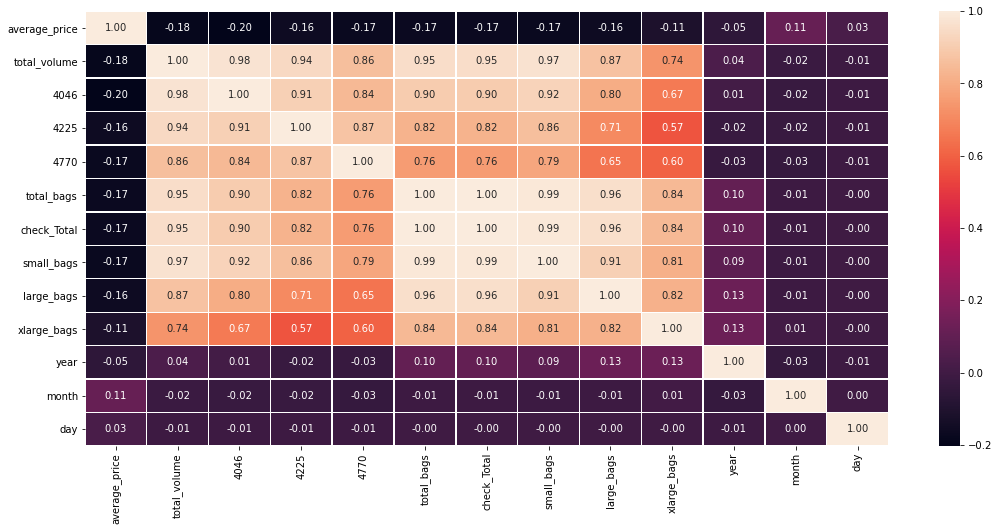

In [17]:
f,axis = plt.subplots(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True, linewidths=.4, fmt= '.2f',ax=axis)
plt.show()

As boxes goes lighter, correlation gets stronger. We can easily observe that __average_price__ has nothing to do with the type or number of bags. But we can say, as __total_volume__ gets a higher value, the number of __small_bags__ increases faster than __large_bags__ and __xlarge_bags__.

### Answer to some questions 
__**Organic vs Conventional**__ : The main difference between organic and conventional food products are the chemicals involved during production and processing. The interest in organic food products has been rising steadily over the recent years with new health super fruits emerging. Let's see if this is also the case with our dataset

<a id=section12></a>

- __Q.1 What is the number of avocados sold per type?__

type
conventional    3.094906e+10
organic         1.051703e+09
Name: total_volume, dtype: float64


<AxesSubplot:xlabel='type'>

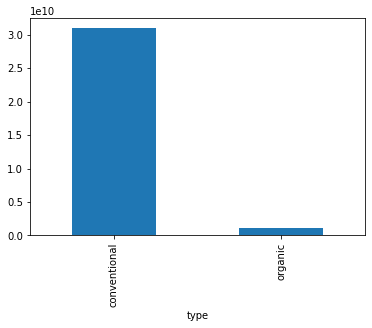

In [18]:
avocado_type = df.groupby(['type'])['total_volume'].sum()
print(avocado_type)

avocado_type.plot.bar()

As we can see from the graph, the number of avocados from the conventional type are highly sold. 

<a id=section12></a>

- __Q.2 Which type of avocados are more in demand (Conventional or Organic)?__

In [19]:
pd.value_counts(df['type'])

conventional    16524
organic         16521
Name: type, dtype: int64

C:\Users\deyna\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


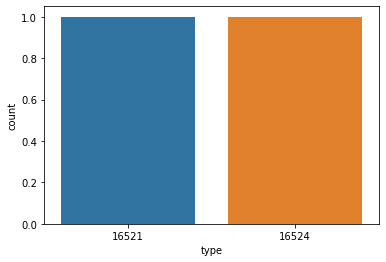

In [20]:
data=df['type'].value_counts()
sns.countplot(data)

plt.show()

#### Observation : 
- The observation shows that in the numbers, both of the avocado types are almost equal. However, there is a small difference with 3 bags in the total volume.

<a id=section12></a>

-  __Q.3 What is the Average price of organic and conventional avocados for different years?__

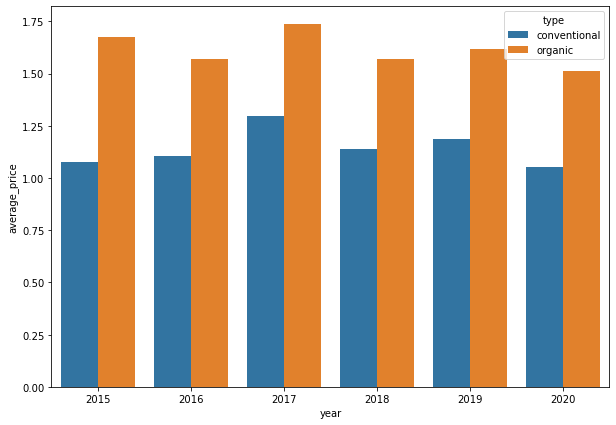

In [21]:
price = df.groupby(['type','year'])['average_price'].mean().reset_index()

plt.figure(figsize=(10,7));
ax = sns.barplot(x='year', y='average_price', hue='type', data=price)

#### Observation :
From the above plot, we can see that the __price of Organic Avocados has been consistently high over all the years__ when compared to the conventional avocados, despite the __demand being high for Conventional Avocados.__ 

<a id=section12></a>

- __Q.4 In which range average price lies, what is distribution look like?__

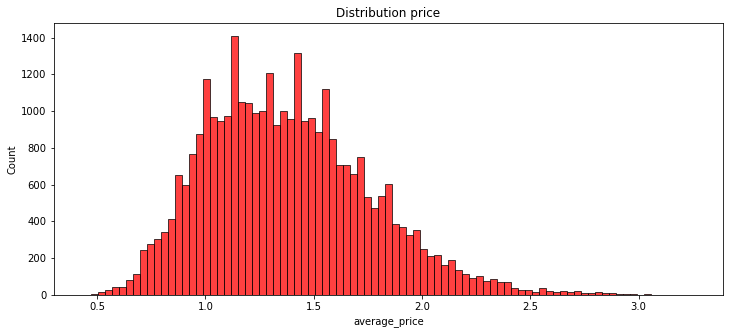

In [22]:
from scipy.stats import norm
import pylab as pl
pl.figure(figsize=(12,5))
pl.title('Distribution price')
ax = sns.histplot(df['average_price'], color = 'r')

<a id=section12></a>

 - __Q.5  How is the price distribution of avocados based on type - conventional and organic ?__

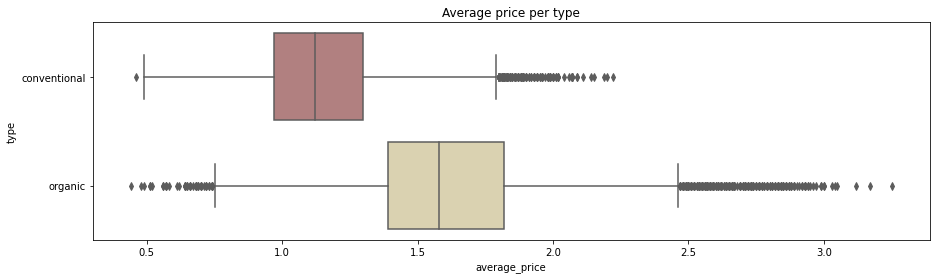

In [23]:
plt.figure(figsize=(15,4))
plt.title('Average price per type')
ax = sns.boxplot(y='type',x='average_price',data=df, palette='pink')

#### Observation :
As we can observe, __organic__ avocados are more expensive. This is obvious, because their cultivation is more expensive and we all love natural products. People are willing to pay a higher price for them. But it is likely that the price of avocado depends not only on the type.
- Average Price distribution shows that for most cases __price of avocado is between 1.1, 1.4.__
    - However, it seems like we have quite a lot of outliers, especially on organic avocados. Let's check that out. 

 <a id=section12></a>

In [24]:
df.describe()

,average_price,total_volume,4046,4225,4770,total_bags,check_Total,small_bags,large_bags,xlarge_bags,year,month,day
count,33045.000000,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,33045.000000,33045.000000,33045.000000
mean,1.379941,9.683997e+05,3.023914e+05,2.797693e+05,2.148255e+04,3.646735e+05,3.646735e+05,2.501980e+05,1.067329e+05,7.742585e+03,2017.460887,6.372401,15.529339
std,0.378972,3.934533e+06,1.301026e+06,1.151052e+06,1.001607e+05,1.564004e+06,1.564004e+06,1.037734e+06,5.167226e+05,4.819803e+04,1.699747,3.384730,8.833129
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000,1.000000,1.000000
25%,1.100000,1.511895e+04,7.673100e+02,2.712470e+03,0.000000e+00,9.121860e+03,9.121860e+03,6.478630e+03,4.662900e+02,0.000000e+00,2016.000000,3.000000,8.000000
50%,1.350000,1.291170e+05,1.099477e+04,2.343600e+04,1.780900e+02,5.322224e+04,5.322224e+04,3.687699e+04,6.375860e+03,0.000000e+00,2017.000000,6.000000,15.000000
75%,1.620000,5.058285e+05,1.190219e+05,1.352389e+05,5.096530e+03,1.744314e+05,1.744314e+05,1.206624e+05,4.041723e+04,8.044400e+02,2019.000000,9.000000,23.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,3.168919e+07,3.168919e+07,2.055041e+07,1.332760e+07,1.403184e+06,2020.000000,12.000000,31.000000


__IQR__ = Q3 - Q1 = 1.62 - 1.51 = 0.52

Q3 + (1.5).(IQR) = 1.62 + (1.5).(0.52) = 2.4 (upper threshold)

Q1 - (1.5).(IQR) = 1.10 - (1.5).(0.52) = 0.32 (lower threshold)

Avocados that have average price higher than 2.4 or lower than 0.32 are outliers. Let's check how many outliers do we have.

In [25]:
outliers = (df['average_price'] > 2.4) | (df['average_price'] < 0.32)
df[outliers].count()

date             338
average_price    338
total_volume     338
4046             338
4225             338
4770             338
total_bags       338
check_Total      338
small_bags       338
large_bags       338
xlarge_bags      338
type             338
year             338
geography        338
month            338
day              338
dtype: int64

We could observe that we have 338 outliers from data that contains 33045 rows, which is almost nothing. 

In [26]:
from scipy import stats

z = np.abs(stats.zscore(df.average_price))
z.tolist()

[0.42204486945796615,
 1.082047554993133,
 1.0025717701233026,
 1.0028847958114961,
 0.791471078972271,
 0.2373317647008135,
 0.9761841837294236,
 0.6862337590849488,
 0.9497965973355447,
 1.1875979005686488,
 0.052931685631854436,
 0.9237220366298593,
 1.187284874880455,
 0.36926969667020826,
 0.501207628639603,
 1.9792254923850163,
 0.712308319790634,
 0.290419963176765,
 1.3192228068498497,
 0.10539383273141871,
 1.2928352204559708,
 0.15848203120737026,
 1.6886490163641548,
 0.07900624633753975,
 1.0289593565171815,
 0.10570685841961235,
 0.9761841837294236,
 0.8445592774482225,
 1.1345097020926973,
 0.5806834135094335,
 0.9497965973355447,
 0.4223578951461598,
 0.8706338381539078,
 0.7917841046604646,
 0.8442462517600289,
 2.480589633868716,
 1.7678117755457916,
 0.42204486945796615,
 0.9497965973355447,
 0.6598461726910698,
 1.0817345293049394,
 1.1348227277808909,
 1.530323498000881,
 0.316807549570644,
 1.3983855660314866,
 0.3428821102763293,
 1.213672461274334,
 0.26403237678

In [27]:
threshold = 3
print(np.where(z > 3))

(array([ 3217,  3325,  3433,  3541,  3649,  3757,  3865,  3973,  4081,
        4189,  4297,  4405,  4513,  5161,  9762,  9826,  9870,  9894,
        9912,  9934, 10020, 10086, 10150, 10164, 10234, 10236, 10302,
       10326, 10332, 10342, 10344, 10346, 10354, 10366, 10402, 10448,
       10452, 10510, 10532, 10556, 10560, 10664, 10668, 10726, 10772,
       10776, 10880, 10884, 10942, 10992, 11100, 11208, 11316, 11424,
       11532, 11748, 11964, 12072, 12180, 12288, 12304, 12346, 12360,
       12396, 12412, 12468, 12504, 12612, 12720, 12778, 12828, 12900,
       12914, 12936, 12952, 12974, 13034, 13044, 13082, 13142, 13152,
       13250, 13256, 13260, 13318, 13368, 13426, 13466, 13476, 13534,
       13574, 13584, 13692, 13750, 13800, 13834, 13852, 13908, 13941,
       13959, 13965, 14015, 14017, 14048, 14072, 14122, 14132, 14156,
       14180, 14340, 14348, 14448, 14456, 14556, 14664, 14770, 14772,
       14780, 14800, 14866, 14868, 14878, 14880, 14888, 14890, 14904,
       14908, 14914

In [28]:
df = df[(z < 3)]
print(df)

            date  average_price  total_volume        4046       4225  \
0     2015-01-04           1.22      40873.28     2819.50   28287.42   
1     2015-01-04           1.79       1373.95       57.42     153.88   
2     2015-01-04           1.00     435021.49   364302.39   23821.16   
3     2015-01-04           1.76       3846.69     1500.15     938.35   
4     2015-01-04           1.08     788025.06    53987.31  552906.04   
...          ...            ...           ...         ...        ...   
33040 2020-11-29           1.47    1583056.27    67544.48   97996.46   
33041 2020-11-29           0.91    5811114.22  1352877.53  589061.83   
33042 2020-11-29           1.48     289961.27    13273.75   19341.09   
33043 2020-11-29           0.67     822818.75   234688.01   80205.15   
33044 2020-11-29           1.35      24106.58     1236.96     617.80   

           4770  total_bags  check_Total  small_bags  large_bags  xlarge_bags  \
0         49.90     9716.46      9716.46     9186.93  

In [29]:
df.shape

(32819, 16)

 <a id=section12></a>

 <a id=section12></a>

- __Q.6 How Average price is distributed over the months for Conventional and Organic Types?__

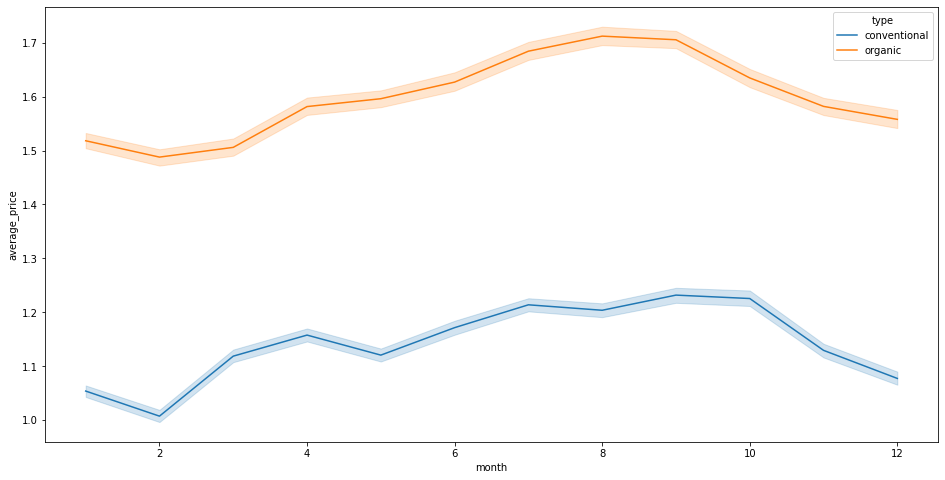

In [30]:
plt.figure(figsize=(16,8))
sns.lineplot(x='month', y='average_price', hue='type', data=df)
plt.show()

#### Observation :
- Looks like there was a __hike in price between months July and October for both Conventional and Organic type__ for Avocados.

<a id=section12></a>

- __Q.7 Which are the TOP 5 regions where the average price is very high?__

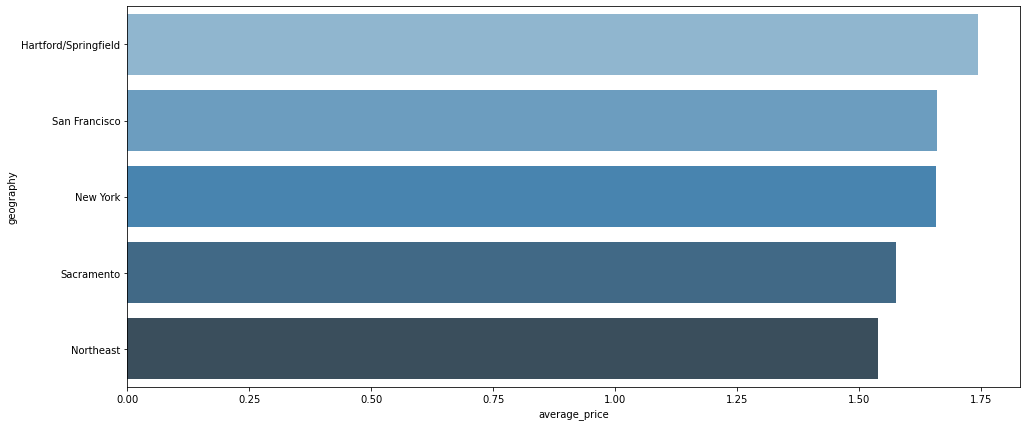

Top 5 regions with high average price: ['Hartford/Springfield', 'San Francisco', 'New York', 'Sacramento', 'Northeast'] 


In [31]:
plt.figure(figsize=(16,7))
regionP = df.groupby('geography')['average_price'].mean()

expensive = regionP.sort_values(ascending = False).iloc[:5]

sns.barplot(x='average_price', y='geography', data = df, order=expensive.index, ci=None, palette='Blues_d')

plt.show()

expensive = pd.DataFrame(expensive).reset_index()

print('Top 5 regions with high average price: {} '.format(list(expensive.iloc[:5,0])))

With this plot I wanted to check if the price of the avocados is influenced by how large the region is. 

<a id=section12></a>

- __Q.8 What are the TOP 5 regions where the average consumption is very high?__

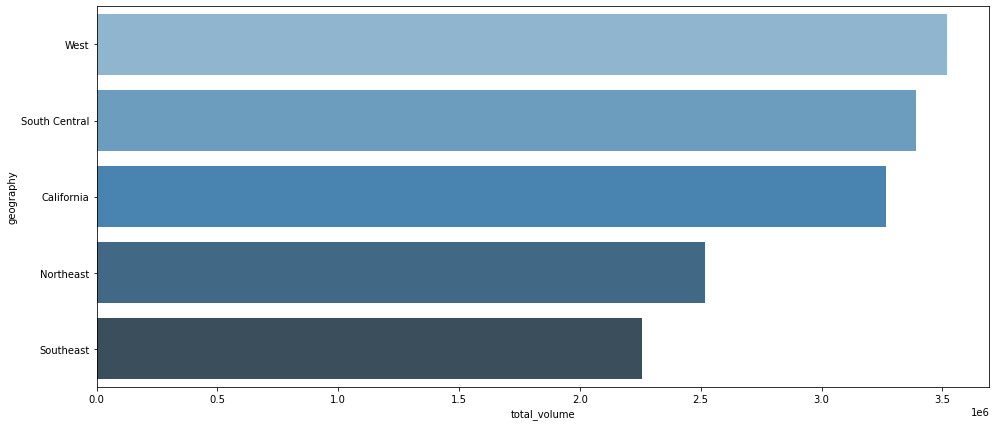

Top 5 regions with high average consumption: ['West', 'South Central', 'California', 'Northeast', 'Southeast'] 


In [64]:
plt.figure(figsize=(16,7))
avoStates = df[df['geography'] !='Total U.S.']

regionV = avoStates.groupby('geography')['total_volume'].sum()
most = regionV.sort_values(ascending = False).iloc[:5]

sns.barplot(x='total_volume', y='geography', data = avoStates, order=most.index, ci=None, palette='Blues_d')
plt.show()
most = pd.DataFrame(most).reset_index()

print('Top 5 regions with high average consumption: {} '.format(list(most.iloc[:5,0])))

The same chack as the previous plot is done here. I wanted to check if the consumption is high in the more inhabited regions.

<a id=section12></a>

- __Q.9 How does the yearly sales look like?__

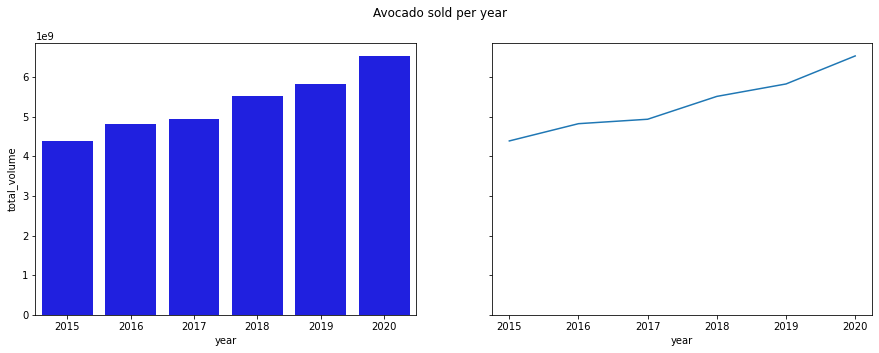

In [32]:
sold_per_year = df.groupby(['year'])['total_volume'].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True);
fig.suptitle('Avocado sold per year');

sns.barplot(x='year', y='total_volume', ax= axes[0] ,data=sold_per_year,color="b");
sns.lineplot(x=sold_per_year['year'],y=sold_per_year['total_volume'], ax= axes[1]);

From the above graphs we could observe that the sales of avocados have increased over the years. A possible explanation could be that avocados are geting more and more popular as they are highly consumed by sports people.

<a id=section12></a>

- __Q.10 What is the avocado's yearly average price?__

,average_price
year,
2015,1.372235
2016,1.329057
2017,1.484190
2018,1.353832
2019,1.396413
2020,1.282001


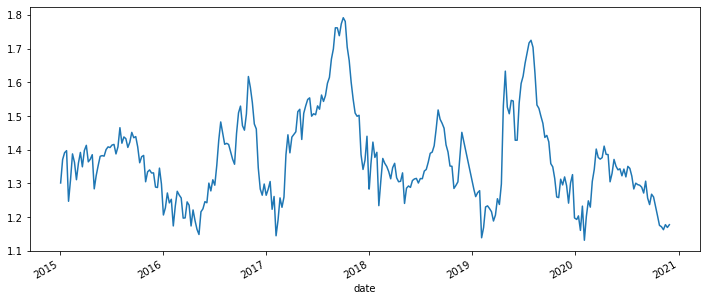

In [33]:
plt.figure(figsize=(12,5))

df_date = df.groupby(['date'])['average_price'].mean()
df_date = df_date.to_frame(name='average_price')
df_date['average_price'].plot();

years = df.groupby('year')[['average_price']].mean()
display(years)

From the above plot, we could definetely observe that we have seasonality occuring into our data.

<a id=section12></a>

<a id=section12></a>

- __Q.11 How price is distributed over the different days in a month?__

Text(0.5, 1.0, 'Average Price')

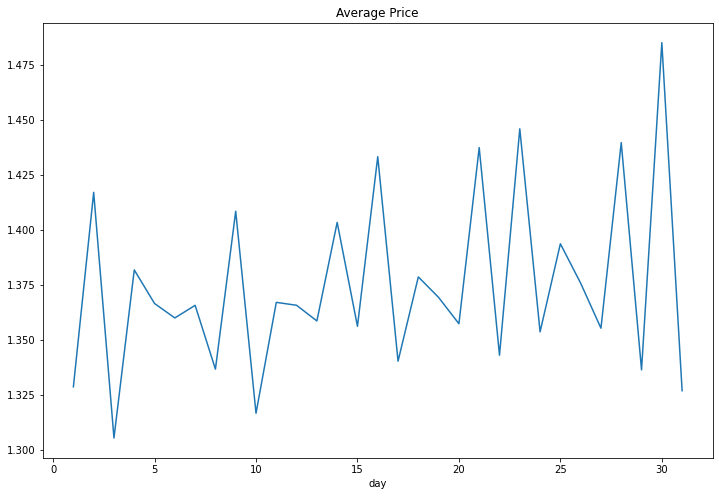

In [34]:
byDate = df.groupby('day').mean()
plt.figure(figsize=(12,8))
byDate['average_price'].plot()
plt.title('Average Price')

We could obviously see that there certainly are days of the month when the price is increasing steadily.

<a id=section12></a>

<a id=section12></a>

- __Q.12 When could we find cheaper avocados?__

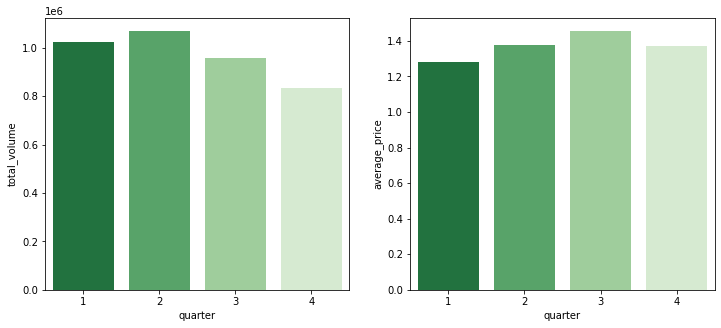

,total_volume,average_price
quarter,,
1,1.024697e+06,1.282907
2,1.069264e+06,1.374219
3,9.588359e+05,1.455392
4,8.337893e+05,1.370605


In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

df['quarter'] = df['date'].dt.quarter


sns.barplot(x='quarter', y='total_volume', data=df, palette='Greens_r', ci=None, ax=ax[0])
sns.barplot(x='quarter', y='average_price', data=df, palette='Greens_r', ci=None, ax=ax[1])


plt.show()

quarter = df.groupby('quarter')[['total_volume', 'average_price']].mean()
display(quarter)

- Observation: 
   - So we see that in the first quarter of the year sales are higher than in other quarters and prices are lower.
   - After the first quarter, sales decrease and prices grow. Given the popularity of avocados, businesses should be considering importing more avocados when they are not produced in the country, a big oportunity for business-men from both countries.